# 6 - English text preprocessing basics

2022 January 19

![text](img/text.png)

Unstructured text - text you find in the wild in books and websites - is generally not amenable to analysis. Before it can be analyzed, the text needs to be standardized to a format so that Python can recognize each unit of meaning (called a "token") as unique, no matter how many times it occurs and how it is stylized. 

Although not an exhaustive list, some key steps in preprocessing text include:  
* Standardizing text casing and text spacing 
* Remove punctuation and special characters/symbols
* Remove stop words
* Stem or lemmatize: convert all non-base words to their base form 

Stemming/lemmatization and stop words (and some punctuation) are language-specific. NLTK works for English out-of-the-box, but you'll need different code to work with other languages. Some languages (e.g. Chinese) also require *segmentation*: artificially inserting spaces between words. If you want to do text pre-processing for other languages, please let us know and we can put together a notebook for you.

In [1]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from string import punctuation
import pandas as pd
import seaborn as sns
from collections import Counter
import regex as re

In [2]:
# ensure you have the proper nltk modules
import nltk
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('omw-1.4')

[nltk_data] Downloading package words to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
text = open("data/dracula.txt").read()

# print just the first 100 characters
print(text[:100])

The Project Gutenberg eBook of Dracula, by Bram Stoker

This eBook is for the use of anyone anywhere


## Standardize Text casing & spacing

Oftentimes in text analysis, identifying occurences of key word(s) is a necessary step. To do so, we may want "apple," "ApPLe," and "apple      " to be treated the same; i.e., as an occurence of the token, 'apple.' To achieve this, we can standardize text casing and spacing: 

In [4]:
# Converting all charazcters in a string to lowercase only requires one method: 
message = "Hello! Welcome      to        TAML!"
print(message.lower())

# To replace instances of multiple spaces with one, we can use the regex module's 'sub' function:
# Documentation on regex can be found at: https://docs.python.org/3/library/re.html
single_spaces_msg = re.sub('\s+', ' ', message) 
print(single_spaces_msg)

hello! welcome      to        taml!
Hello! Welcome to TAML!


### Remove punctuation

Remember that Python methods can be chained together. 

Below, a standard for loop loops through the `punctuation` module to replace any of these characters with nothing.

In [5]:
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
for char in punctuation:
    text = text.lower().replace(char, "")

In [7]:
print(text[:100])

the project gutenberg ebook of dracula by bram stoker

this ebook is for the use of anyone anywhere 


## Tokenize the text

Split each word on spaces.

In [8]:
# .split() returns a list of the tokens in a string, separated by the specified delimiter (default: " ")
tokens = text.split()

In [9]:
print(tokens[:20])

['the', 'project', 'gutenberg', 'ebook', 'of', 'dracula', 'by', 'bram', 'stoker', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the']


### Remove stop words



Below is a list comprehension (a sort of shortcut for loop) that can accomplish this task for us.

In [10]:
filtered_text = [word for word in tokens if word not in stopwords.words('english')]

In [11]:
# show only the first 100 words
print(filtered_text[:100])

['project', 'gutenberg', 'ebook', 'dracula', 'bram', 'stoker', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'wwwgutenbergorg', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'title', 'dracula', 'author', 'bram', 'stoker', 'release', 'date', 'october', '1995', 'ebook', '345', 'recently', 'updated', 'march', '12', '2021', 'language', 'english', 'character', 'set', 'encoding', 'utf8', 'produced', 'chuck', 'greif', 'online', 'distributed', 'proofreading', 'team', 'start', 'project', 'gutenberg', 'ebook', 'dracula', 'dracula', 'dracula', 'bram', 'stoker', 'illustration', 'colophon', 'new', 'york', 'grosset', 'dunlap', 'publishers', 'copyright', '1897', 'united', 'states', 'america', 'according', 'act', 'congress', 'bram', 'stoker', 'rights', 'reserved', 'print

## Lemmatizing/Stemming tokens

Lemmatizating and stemming are related, but different practices. Both processes aim to reduce the inflectional forms of a token to a common base/root. However, how they go about doing so is the key differentiating factor.  

Stemming operates by removes the prefixs and/or suffixes of a word. Examples include: 
* flooding to flood 
* studies to studi
* risky to risk 

Lemmatization attempts to contextualize a word, arriving at it's base meaning. Lemmatization reductions can occur across various dimensions of speech. Examples include: 
* Plural to singular (corpora to corpus)
* Condition (better to good)
* Gerund (running to run)

One technique is not strictly better than the other - it's a matter of project needs and proper application. 

In [12]:
stmer = nltk.PorterStemmer()

lmtzr = nltk.WordNetLemmatizer()

In [13]:
token_stem  = [ stmer.stem(token) for token in filtered_text]

token_lemma = [ lmtzr.lemmatize(token) for token in filtered_text ]

print(token_stem[:10])

print(token_lemma[:10])

['project', 'gutenberg', 'ebook', 'dracula', 'bram', 'stoker', 'ebook', 'use', 'anyon', 'anywher']
['project', 'gutenberg', 'ebook', 'dracula', 'bram', 'stoker', 'ebook', 'use', 'anyone', 'anywhere']


## Part of speech tags

Part of speech tags are labels given to each word in a text such as verbs, adverbs, nouns, pronouns, adjectives, conjunctions, and their various derivations and subcategories. 

In [14]:
tagged = nltk.pos_tag(token_lemma)

# Let's see a quick example: 
ex_string = 'They refuse to permit us to obtain the refuse permit.'
print(nltk.pos_tag(ex_string.split())) 

[('They', 'PRP'), ('refuse', 'VBP'), ('to', 'TO'), ('permit', 'VB'), ('us', 'PRP'), ('to', 'TO'), ('obtain', 'VB'), ('the', 'DT'), ('refuse', 'NN'), ('permit.', 'NN')]


The output of .pos_tag is a list of tuples (pairs), where the first element is a text token and the second is a part of speech. Note that, in our example string, the token 'refuse' shows up twice - once as a verb, and once as a noun. In the output to .pos_tag, the first tuple with 'refuse' has the 'VBP' tag (present tense verb) and the second tuple has the 'NN' tag (noun). Nifty!

In [15]:
chunked = nltk.chunk.ne_chunk(tagged)

## Convert to dataframe

In [16]:
df = pd.DataFrame(chunked, columns=['word', 'pos'])

In [17]:
df.head()

,word,pos
0,project,NN
1,gutenberg,NN
2,ebook,NN
3,dracula,NN
4,bram,NN


In [18]:
df.shape

(73556, 2)

## Visualize the 20 most frequent words

In [19]:
top = df.copy()

count_words = Counter(top['word'])
count_words.most_common()[:20]

[('said', 569),
 ('one', 509),
 ('could', 493),
 ('u', 463),
 ('must', 451),
 ('would', 428),
 ('shall', 427),
 ('time', 425),
 ('know', 420),
 ('may', 416),
 ('see', 398),
 ('come', 377),
 ('van', 322),
 ('hand', 310),
 ('came', 307),
 ('helsing', 300),
 ('went', 298),
 ('lucy', 296),
 ('go', 296),
 ('like', 278)]

In [20]:
words_df = pd.DataFrame(count_words.items(), columns=['word', 'count']).sort_values(by = 'count', ascending=False)

In [21]:
words_df[:20]

,word,count
209,said,569
256,one,509
155,could,493
180,u,463
319,must,451
162,would,428
278,shall,427
165,time,425
224,know,420
17,may,416


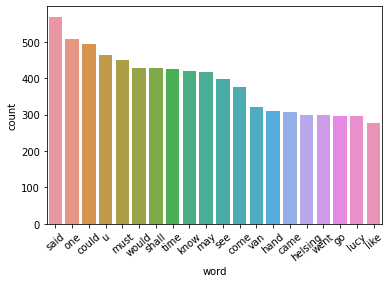

In [22]:
top_plot = sns.barplot(x = 'word', y = 'count', data = words_df[:20])
top_plot.set_xticklabels(top_plot.get_xticklabels(),rotation = 40);

![redwood](img/redwood.png)

# Quiz: Redwood webscraping

This also works with data scraped from the web. Below is very brief BeautifulSoup example to save the contents of the Sequoioideae (redwood trees) Wikipedia page to a variable named `text`. 

1. Read through the code below
2. Practice by repeating for a webpage of your choice
3. Combine methods on this page to produce a ready-to-be analyzed copy of "Frankenstein.txt". This file is located in the `/data` folder

In [23]:
# import necessary libraries
from bs4 import BeautifulSoup
import requests
import regex
import nltk

## Three variables will get you started

1. `url` - define the URL to be scraped 
2. `response` - perform the get request on the URL 
3. `soup` - create the soup object so we can parse the html 

In [24]:
url = "https://en.wikipedia.org/wiki/Sequoioideae"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html')

## Get the text

HTML (hypertext markup language) is used to structure a webpage and the content it contains, including text.

Below is a handy for loop that finds all everything within paragraph `<p>` tags. 

In [25]:
# save in an empty string
text = ""

for paragraph in soup.find_all('p'):
    text += paragraph.text

In [26]:
print(text)


Sequoioideae, popularly known as redwoods, is a subfamily of coniferous trees within the family Cupressaceae. It includes the largest and tallest trees in the world.
The three redwood subfamily genera are Sequoia from coastal California and Oregon, Sequoiadendron from California's Sierra Nevada, and Metasequoia in China. The redwood species contains the largest and tallest trees in the world. These trees can live for thousands of years. Threats include logging, fire suppression,[2] climate change, illegal marijuana cultivation, and burl poaching.[3][4][5]
Only two of the genera, Sequoia and Sequoiadendron, are known for massive trees. Trees of Metasequoia, from the single living species Metasequoia glyptostroboides, are much smaller.
Multiple studies of both morphological and molecular characters have strongly supported the assertion that the Sequoioideae are monophyletic.[6][7][8][9]
Most modern phylogenies place Sequoia as sister to Sequoiadendron and Metasequoia as the out-group.[7

## Regular expressions

Remember how we did preprocessing the long way above? You might find that using egular expressions are easier. [Check out the tutorial](https://docs.python.org/3/library/re.html) and [cheatsheet](https://www.dataquest.io/blog/regex-cheatsheet/) to find out what the below symbols mean and write your own code.

In [27]:
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
text = re.sub(r'\d',' ',text)
text = re.sub(r'[^\w\s]','',text)
text = text.lower()

In [28]:
print(text)

 sequoioideae popularly known as redwoods is a subfamily of coniferous trees within the family cupressaceae it includes the largest and tallest trees in the world the three redwood subfamily genera are sequoia from coastal california and oregon sequoiadendron from californias sierra nevada and metasequoia in china the redwood species contains the largest and tallest trees in the world these trees can live for thousands of years threats include logging fire suppression climate change illegal marijuana cultivation and burl poaching only two of the genera sequoia and sequoiadendron are known for massive trees trees of metasequoia from the single living species metasequoia glyptostroboides are much smaller multiple studies of both morphological and molecular characters have strongly supported the assertion that the sequoioideae are monophyletic most modern phylogenies place sequoia as sister to sequoiadendron and metasequoia as the outgroup however yang et al went on to investigate the ori

# Going further: n-grams

We have used indivual words in this example, but what about [n-grams?](https://en.wikipedia.org/wiki/N-gram) Also read through this [n-gram language model with nltk](https://www.kaggle.com/alvations/n-gram-language-model-with-nltk). 

There are also more optimal ways to preprocess your text. Check out the [spaCy 101](https://spacy.io/usage/spacy-101) guide to try it out yourself and attend the CIDR Python Introduction to Text Analysis workshop on February 8, 2022. [Register here](https://appointments.library.stanford.edu/calendar/ssds/cidr-python-text). 